<a href="https://colab.research.google.com/github/wissalmarwani/Music-Genre-Classification-using-PCA-and-Logistic-Regression/blob/main/Music_Genre_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install scikit-learn
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("music_dataset_mod.csv")

In [ ]:
df_copy = df.copy()

df_copy

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [ ]:
print(df_copy.head())  # shows the first 5 rows by default


        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908       

In [ ]:
print(df_copy.shape)


(1000, 13)


In [ ]:
print(df_copy.columns)


Index(['Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
       'String Instrument Detection', 'Electronic Element Presence',
       'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
       'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps',
       'Genre'],
      dtype='object')


In [ ]:
print(df_copy.describe())



             Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
count  1000.000000     1000.000000     1000.000000          1000.000000   
mean    121.177891       46.684324       51.741685            54.854619   
std      19.600614       17.809545       29.008872            29.489650   
min      50.494818       -4.165724        0.408370             0.598517   
25%     107.885045       34.252531       26.635663            29.782438   
50%     121.356455       46.390854       52.245242            54.926936   
75%     135.054584       58.481545       76.919814            79.438614   
max     175.982637      104.932942      109.643123           114.949678   

       String Instrument Detection  Electronic Element Presence  \
count                  1000.000000                  1000.000000   
mean                     58.442054                    48.813244   
std                      29.650752                    33.239190   
min                       0.217449                   -29

In [ ]:

genres_uniques = df['Genre'].unique()
print(genres_uniques)


['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']


In [ ]:
comptage_genres = df['Genre'].value_counts()
print(comptage_genres)

Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/tmp/ipython-input-398137791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df_copy, palette='Set2')


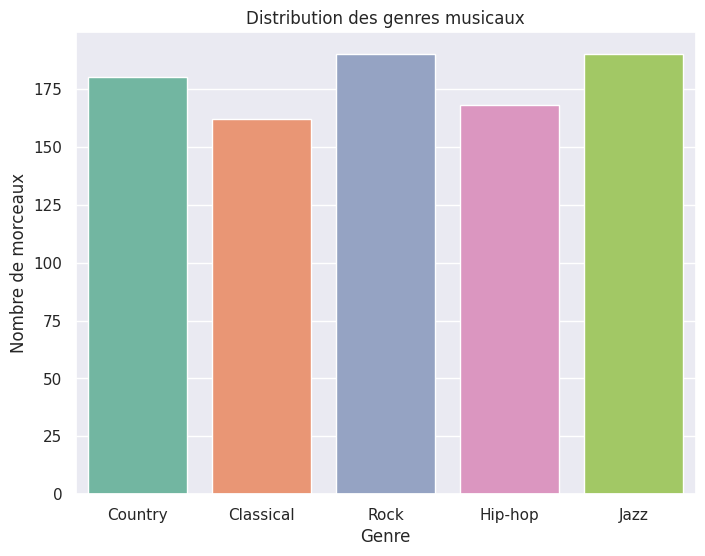

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Genre', data=df_copy, palette='Set2')
plt.title('Distribution des genres musicaux')
plt.xlabel('Genre')
plt.ylabel('Nombre de morceaux')
plt.show()


In [ ]:
df_copy2 = df_copy.dropna()
df_copy2



,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [ ]:
x=df_copy2.drop(columns=['Genre'])
y=df_copy2['Genre']

In [ ]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [ ]:
df_encodedd_genre = df_copy2.copy()
df_encodedd_genre.drop(columns=['Genre'],  inplace=True)
df_encodedd_genre['Genre_encoded'] = y_encoded

In [ ]:
corr_matrix = df_encodedd_genre.corr()
print(corr_matrix['Genre_encoded'].sort_values(ascending=False))

Genre_encoded                  1.000000
Distorted Guitar               0.607291
Metal Frequencies              0.582498
Electronic Element Presence    0.232907
Drums Influence                0.169501
Percussion Strength            0.146171
Tempo                          0.113906
Rhythm Complexity              0.095718
Ambient Sound Influence        0.014561
Vocal Presence                -0.005501
Instrumental Overlaps         -0.071734
String Instrument Detection   -0.185088
Dynamics Range                -0.462600
Name: Genre_encoded, dtype: float64


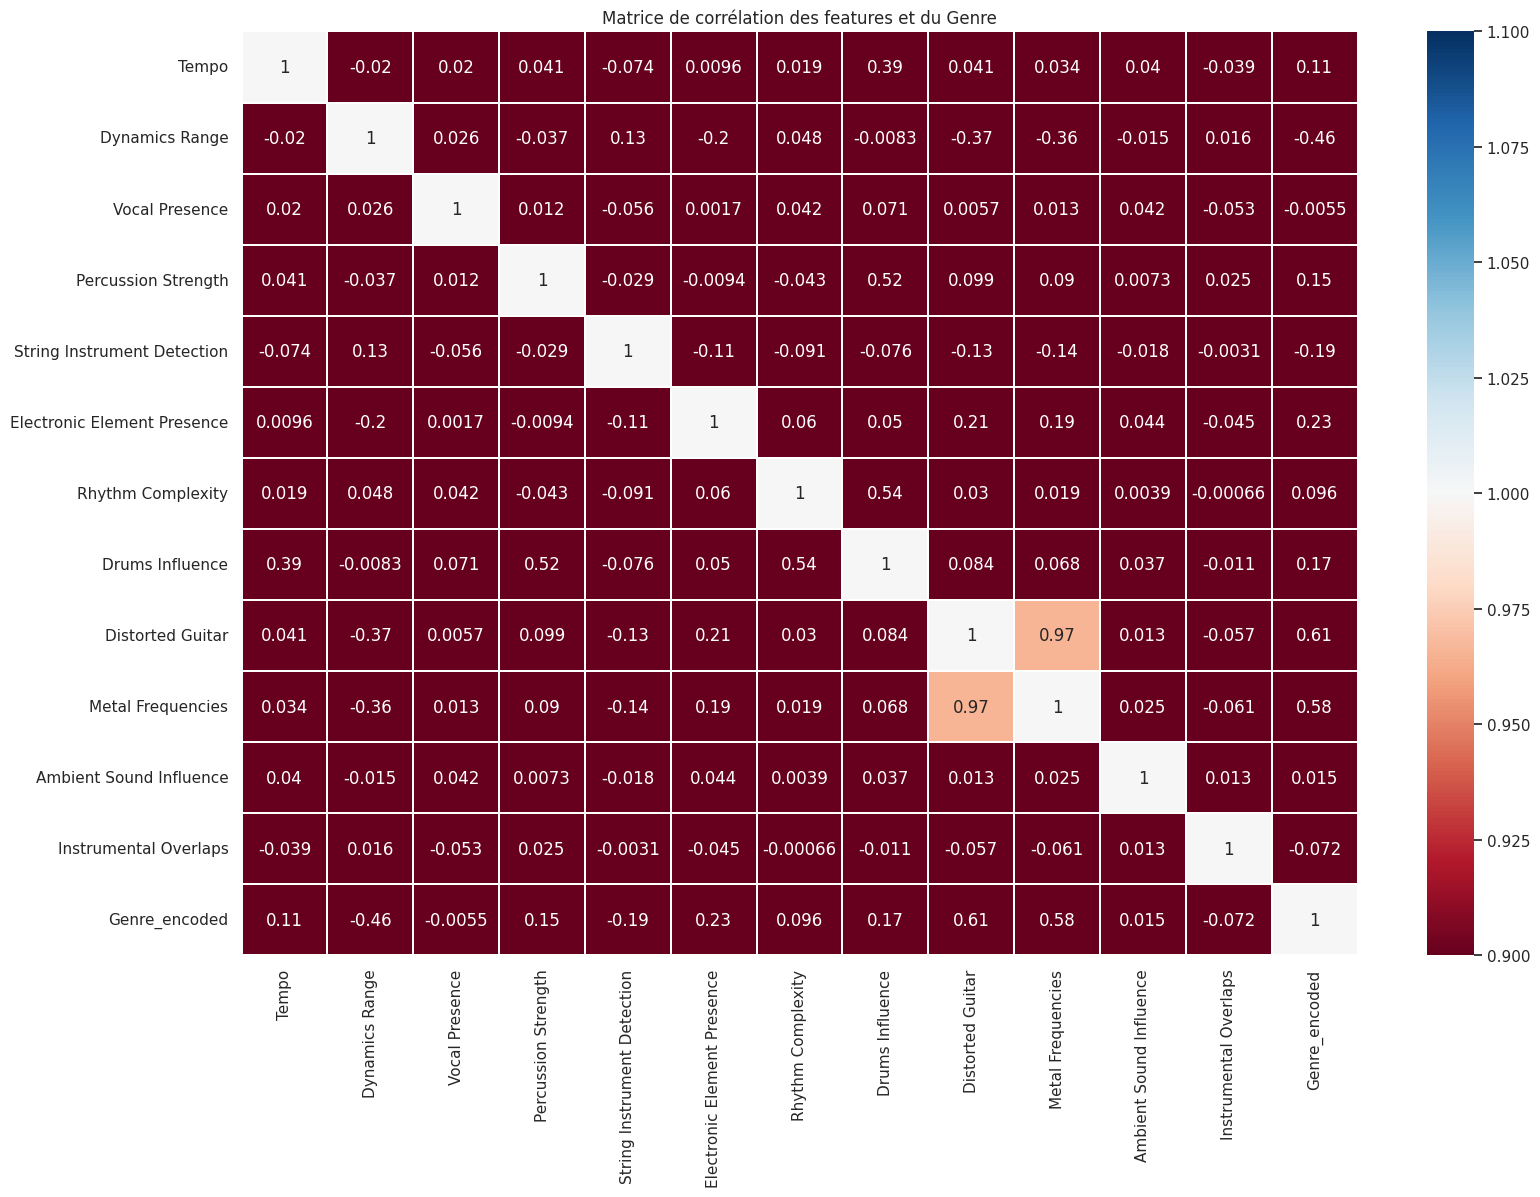

In [ ]:

plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix,vmin=1,vmax=1, annot=True, cmap='RdBu', linewidths=0.1)
plt.title('Matrice de corrélation des features et du Genre')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


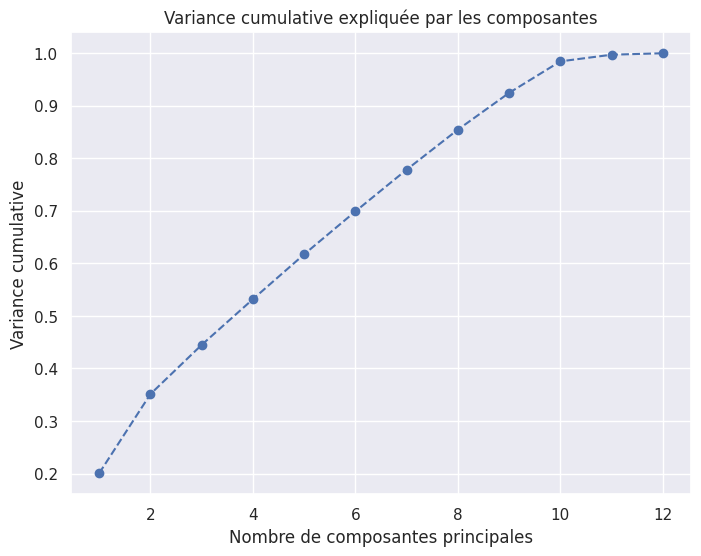

In [ ]:

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,6))
plt.plot(range(1,13), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulative')
plt.title('Variance cumulative expliquée par les composantes')
plt.show()

In [ ]:
pca=PCA (n_components=8)
X_pca= pca.fit_transform(X_scaled)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=10000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = classifier.predict(X_test)
print("Accurancy:",accuracy_score(y_test,y_pred))
print("classification report with original features:", classification_report(y_test, y_pred,target_names=le.classes_))

Accurancy: 0.5355805243445693
classification report with original features:               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [ ]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)
logreg_orig=LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig,y_train_orig)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_orig =logreg_orig.predict(X_test_orig)

acc_orig = accuracy_score(y_test_orig, y_pred_orig)
report_orig = classification_report(y_test_orig,y_pred_orig ,target_names=le.classes_)
print("=== Original scaled features Logistic Regression ===")
print("Accuracy:", acc_orig)
print(report_orig)


=== Original scaled features Logistic Regression ===
Accuracy: 0.5318352059925093
              precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [ ]:
df_unknown_genre = df_copy[df_copy['Genre'].isnull()].copy()
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [ ]:
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

y_unknown_pred = classifier.predict(X_unknown_pca)

In [ ]:
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

In [ ]:
print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


### 1. Initialize a Git repository (if not already done)

Navigate to your project directory (if needed) and run this command. If you already have a `.git` folder, you can skip this step.

### 2. Add your files to the staging area

This command adds all current changes to the staging area. If you only want to add specific files, replace `.` with the file names (e.g., `!git add your_notebook_name.ipynb`).

In [ ]:
import os

# You might need to change the directory to your project's root if it's not the current working directory
# For example, if your code is in a subdirectory 'my_project':
# os.chdir('my_project')

!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git add .

### 3. Commit your changes

This saves your changes to the repository with a descriptive message.

In [ ]:
!git commit -m "Initial commit"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ef897138b22d.(none)')


### 4. Add a remote repository (if not already added)

This links your local repository to a remote one (e.g., on GitHub or GitLab). Replace `YOUR_REMOTE_URL` with the URL of your Git repository.

In [ ]:
!git remote add origin https://github.com/wissalmarwani/Music-Genre-Classification-using-PCA-and-Logistic-Regression

error: remote origin already exists.


### 5. (Optional) Set the main branch name

Many repositories now use 'main' as the default branch name instead of 'master'.

In [ ]:
!git branch -M main

### 6. Push your changes to the remote repository

This uploads your local commits to the remote branch. The `-u` flag sets the upstream branch, so future pushes will be simpler (`!git push`).

In [ ]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'YOUR_REMOTE_URL'


Note: You might be prompted for your Git credentials (username and password/personal access token) when pushing.